In [2]:
#importando as bibliotecas para trabalhar com isto
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



In [3]:
base = pd.read_csv('melb_data.csv')
base

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
base = base.drop(['Suburb','Address','SellerG','Date'],axis=1)

In [5]:
base.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
base = base.drop(['YearBuilt', 'BuildingArea'],axis=1)

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  object 
 4   Distance       13580 non-null  float64
 5   Postcode       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13518 non-null  float64
 9   Landsize       13580 non-null  float64
 10  CouncilArea    12211 non-null  object 
 11  Lattitude      13580 non-null  float64
 12  Longtitude     13580 non-null  float64
 13  Regionname     13580 non-null  object 
 14  Propertycount  13580 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 1.6+ MB


In [8]:
dataframe = base[['Rooms','Price','Distance','Postcode','Bathroom','Bedroom2','Car','Landsize','Lattitude','Longtitude','Propertycount']]

In [9]:
dataframe.dropna(axis=1)

,Rooms,Price,Distance,Postcode,Bathroom,Bedroom2,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,1.0,2.0,202.0,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,1.0,2.0,156.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,2.0,3.0,134.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,2.0,3.0,94.0,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,1.0,3.0,120.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,2.0,4.0,652.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,2.0,3.0,333.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,2.0,3.0,436.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,1.0,4.0,866.0,-37.85908,144.89299,6380.0


<Axes: >

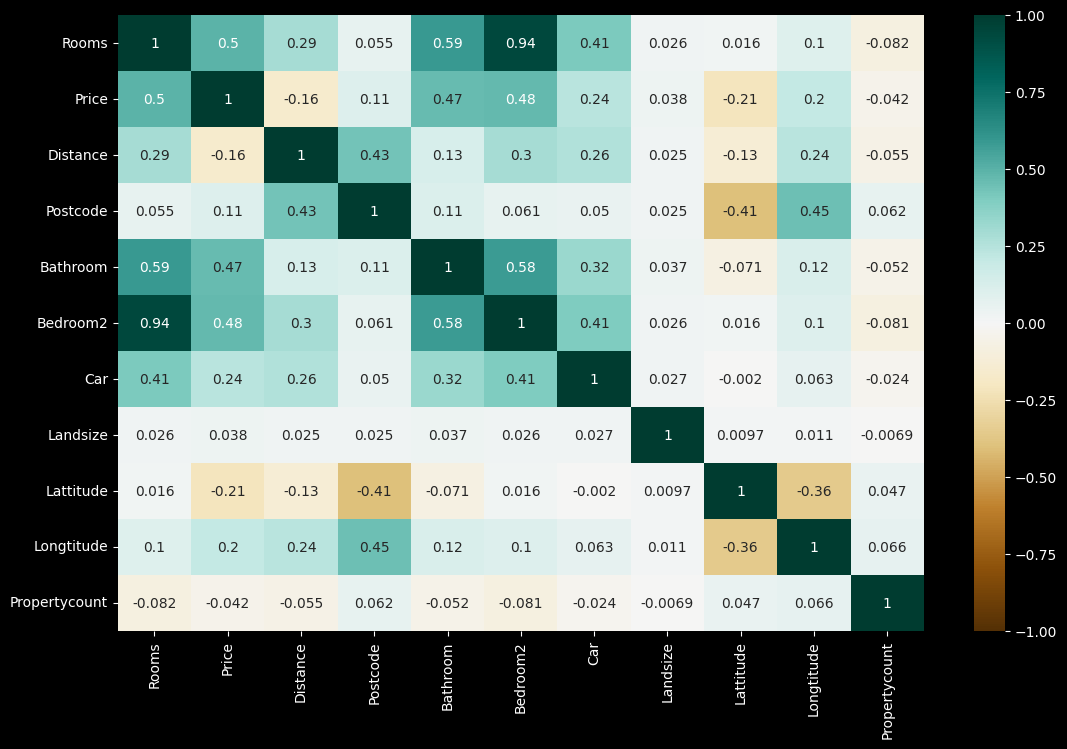

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(dataframe.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')

In [11]:
#pegar todos que a correlação seja maior que 0.25 na linha do price(o car parece importante entao coloquei tambem0,000,)
base_fix = base[['Rooms','Price','Bathroom','Bedroom2','Car']]

<Axes: >

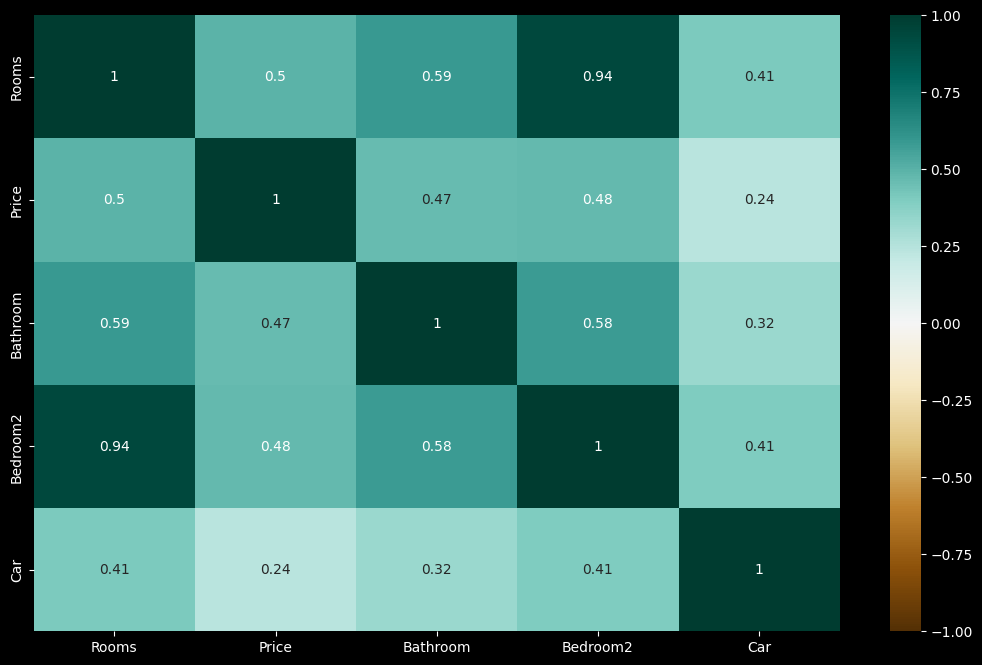

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(base_fix.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')

In [13]:
x = base_fix.Price
y = base_fix.drop("Price",axis=1)

In [14]:
x_treino,x_test,y_treino,y_test = train_test_split(x,y)